<a href="https://colab.research.google.com/github/Pravachana54/ADS-2/blob/main/Kaggle_challange_group8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install shapfrom sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained.")

ERROR: Could not find a version that satisfies the requirement shapfrom (from versions: none)
ERROR: No matching distribution found for shapfrom


NameError: name 'RandomForestClassifier' is not defined

In [2]:
import pandas as pd
test_datapath ='https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/test-3.csv'
test_df = pd.read_csv(test_datapath)
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [3]:
train_dataset='https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/train-3.csv'
train_df=pd.read_csv(train_dataset)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [6]:
test_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [7]:
# 📌 Data Preprocessing & Random Forest Training
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

# Load dataset - Using the train_df already loaded from URL
df = train_df.copy() # Use the existing train_df

# Basic preprocessing
df.fillna(method='ffill', inplace=True)
df['CryoSleep'] = df['CryoSleep'].astype(int)
df['VIP'] = df['VIP'].astype(int)
df['Transported'] = df['Transported'].astype(int)

# Feature selection
X = df[['CryoSleep', 'VIP', 'Age']]
y = df['Transported']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

/tmp/ipython-input-7-638355354.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/tmp/ipython-input-7-638355354.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(method='ffill', inplace=True)


Accuracy: 0.7343300747556066


In [8]:
# Check shapes
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

# Check nulls
train_df.isnull().sum().sort_values(ascending=False)


Train shape: (8693, 14)
Test shape: (4277, 13)


,0
CryoSleep,217
ShoppingMall,208
VIP,203
HomePlanet,201
Name,200
Cabin,199
VRDeck,188
Spa,183
FoodCourt,183
Destination,182


i

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb



In [10]:

# Set random seed
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
train_df = pd.read_csv("https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/train-3.csv")
test_df = pd.read_csv("https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/test-3.csv")


In [12]:
test_passenger_ids = test_df['PassengerId']



<Axes: >

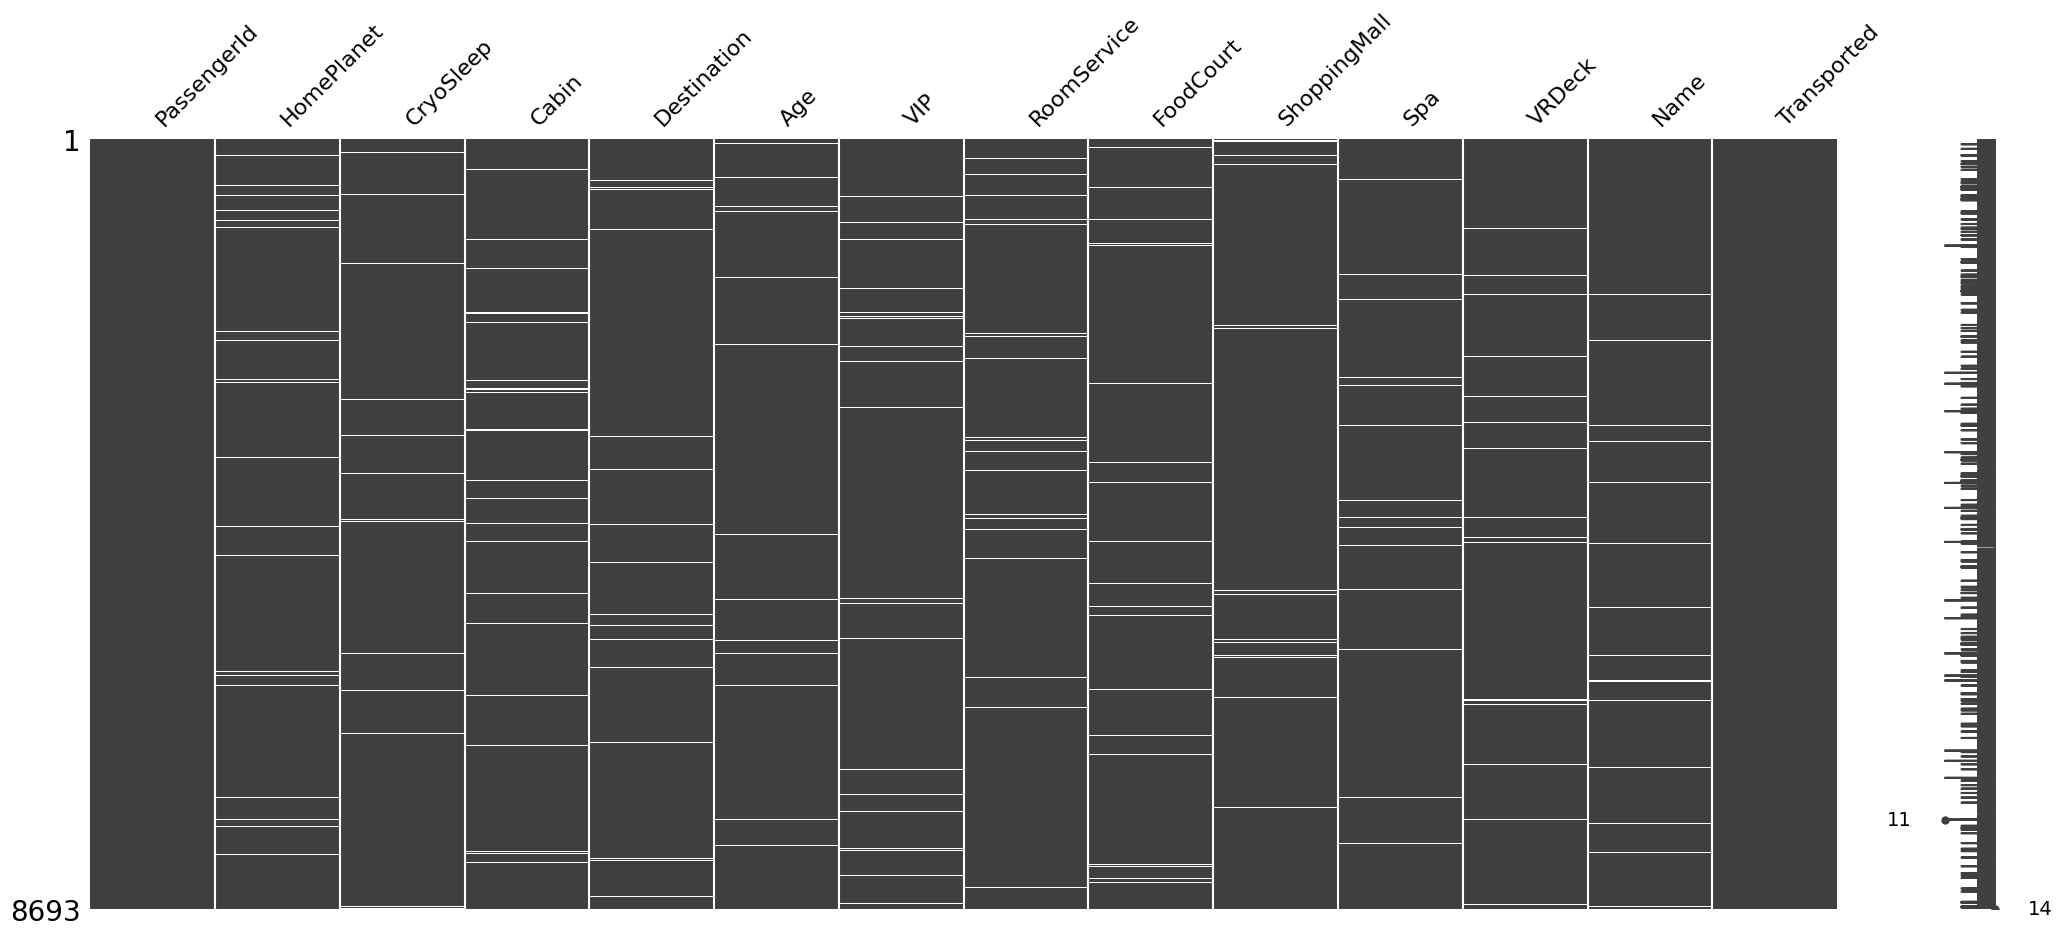

In [13]:
import missingno as msno
msno.matrix(train_df)


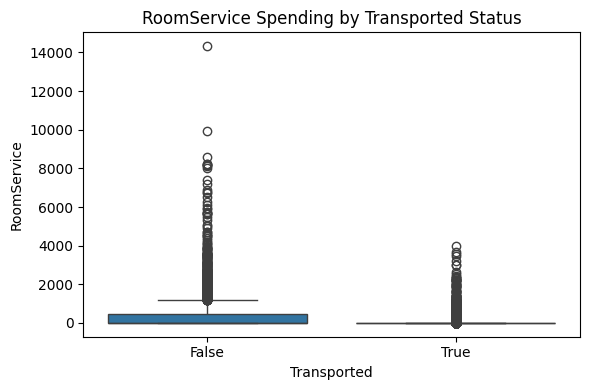

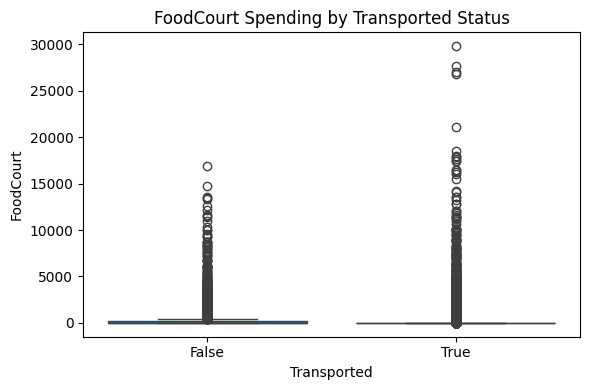

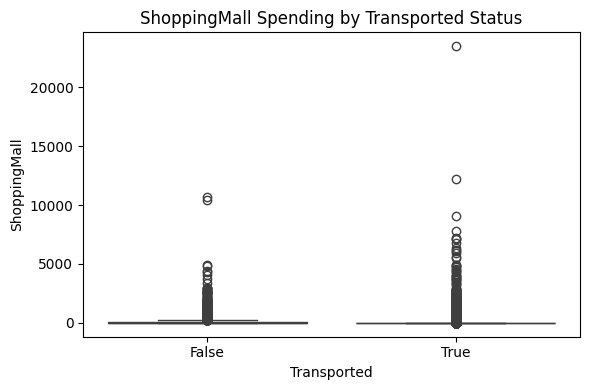

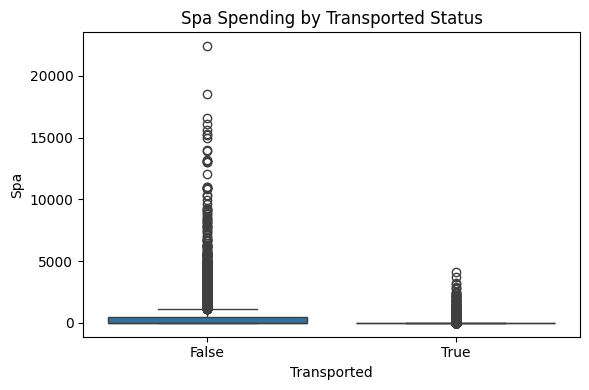

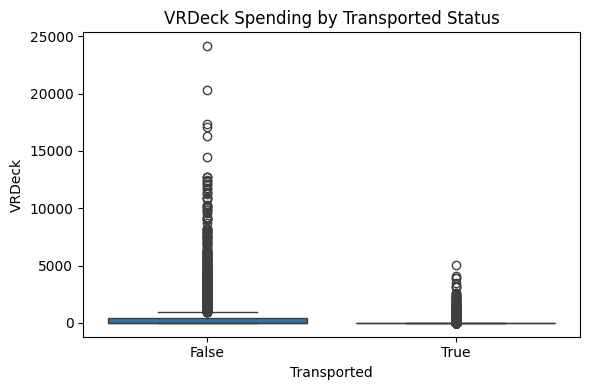

In [14]:
spend_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for feature in spend_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Transported', y=feature, data=train_df)
    plt.title(f'{feature} Spending by Transported Status')
    plt.tight_layout()


Text(0.5, 0, 'Age')

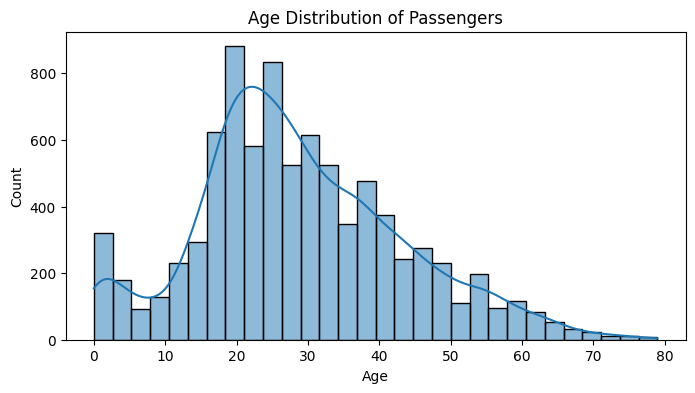

In [15]:
plt.figure(figsize=(8, 4))
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')


Text(0.5, 1.0, 'Age vs Transported')

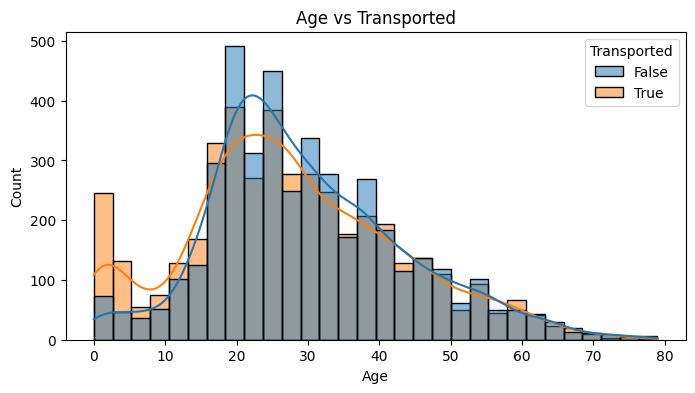

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(data=train_df, x='Age', hue='Transported', bins=30, kde=True)
plt.title('Age vs Transported')


Text(0.5, 1.0, 'CryoSleep Status vs Transported')

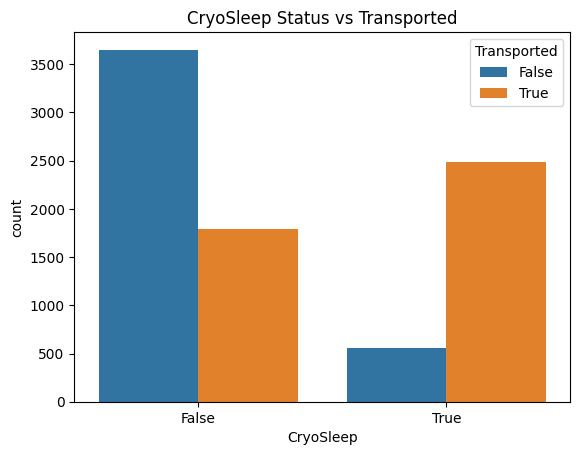

In [17]:
sns.countplot(data=train_df, x='CryoSleep', hue='Transported')
plt.title('CryoSleep Status vs Transported')


Text(0.5, 1.0, 'VIP Status vs Transported')

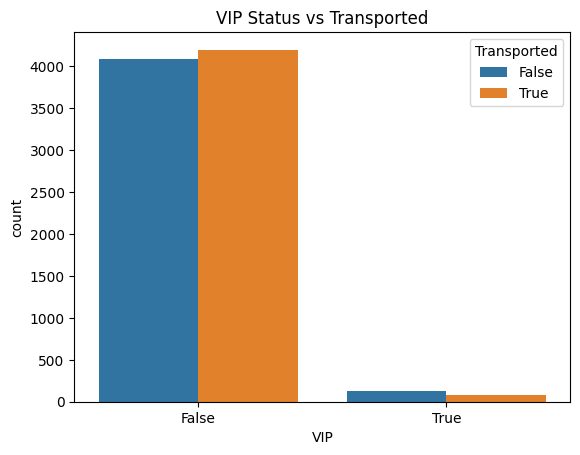

In [18]:
sns.countplot(data=train_df, x='VIP', hue='Transported')
plt.title('VIP Status vs Transported')


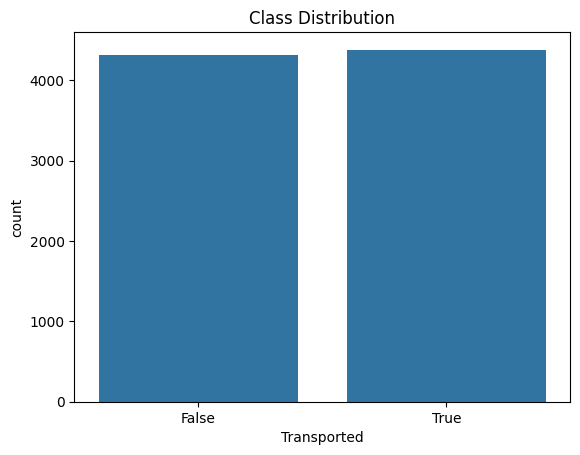

In [19]:
# Class Distribution
sns.countplot(x='Transported', data=train_df)
plt.title("Class Distribution")
plt.show()



Missing values in train data:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


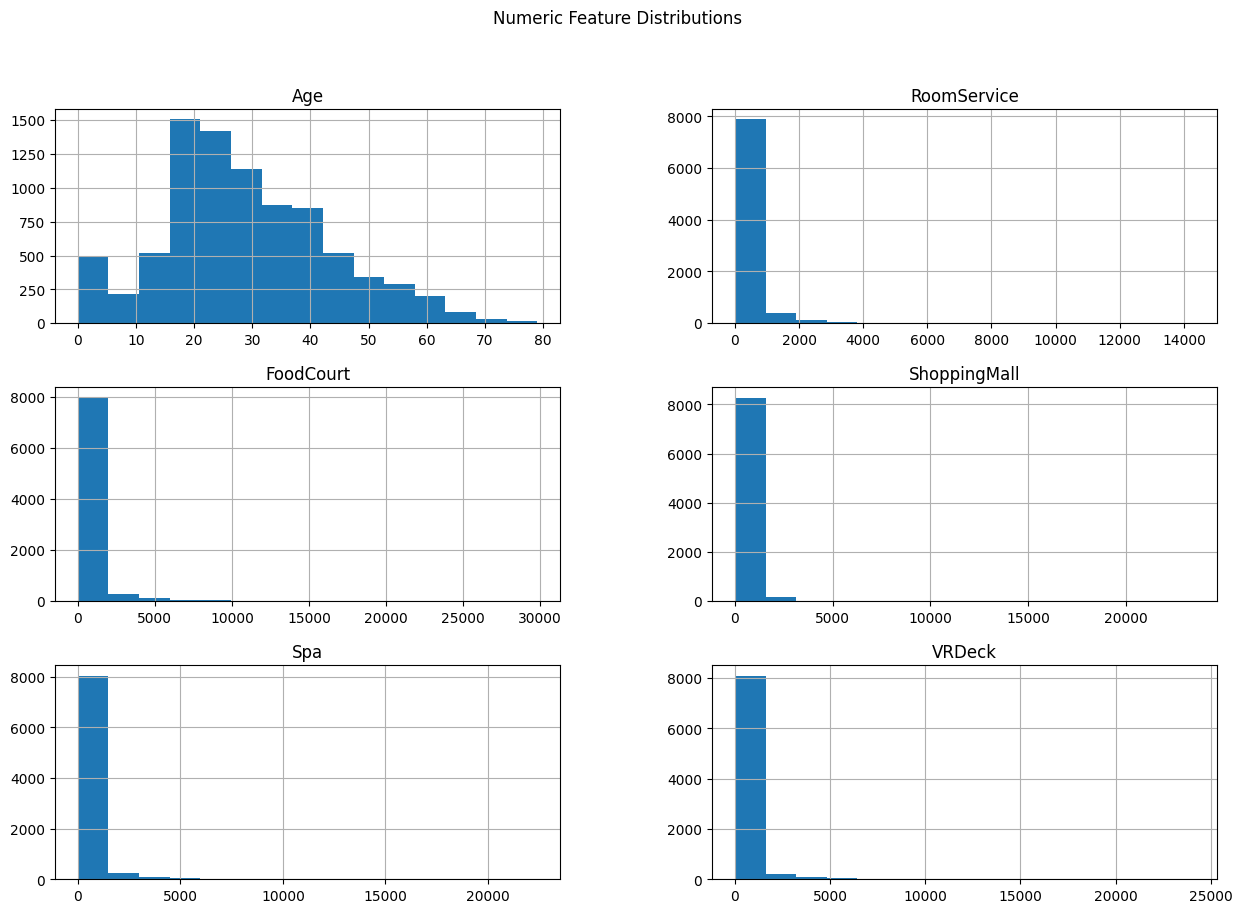

In [20]:

# Check missing data
print("\nMissing values in train data:")
print(train_df.isnull().sum())

# Plot numeric features histograms
num_cols = train_df.select_dtypes(include='number').columns.tolist()
train_df[num_cols].hist(bins=15, figsize=(15,10))
plt.suptitle('Numeric Feature Distributions')
plt.show()

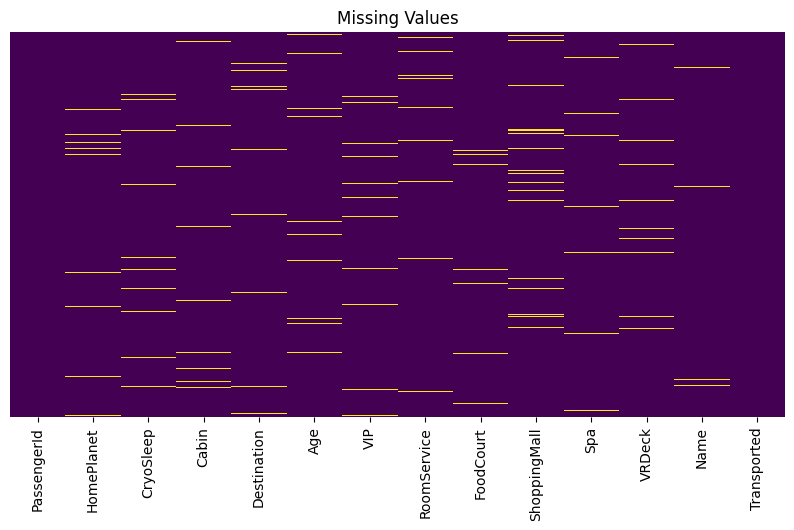

In [21]:
# Missing Values
plt.figure(figsize=(10, 5))
sns.heatmap(train_df.isnull(), cbar=False, yticklabels=False, cmap="viridis")
plt.title("Missing Values")
plt.show()

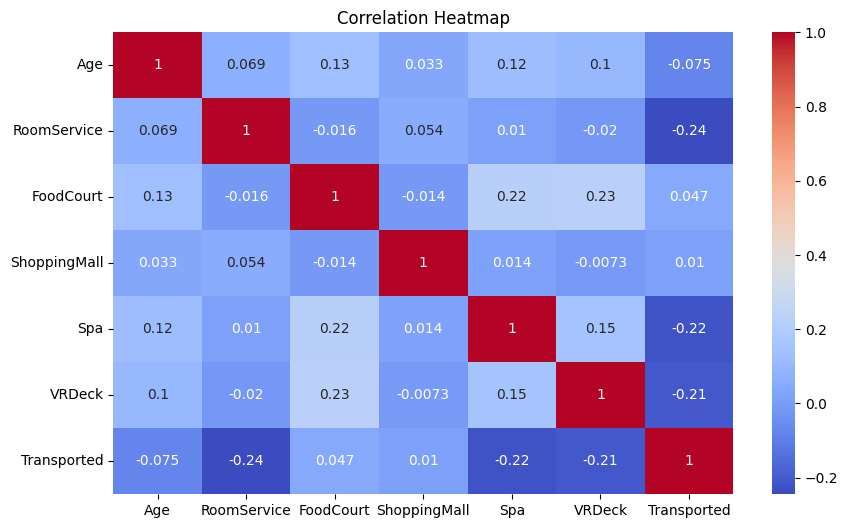

In [22]:
# Correlation Heatmap
df_corr = train_df.copy()
df_corr['Transported'] = df_corr['Transported'].astype(int)
df_corr = df_corr.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

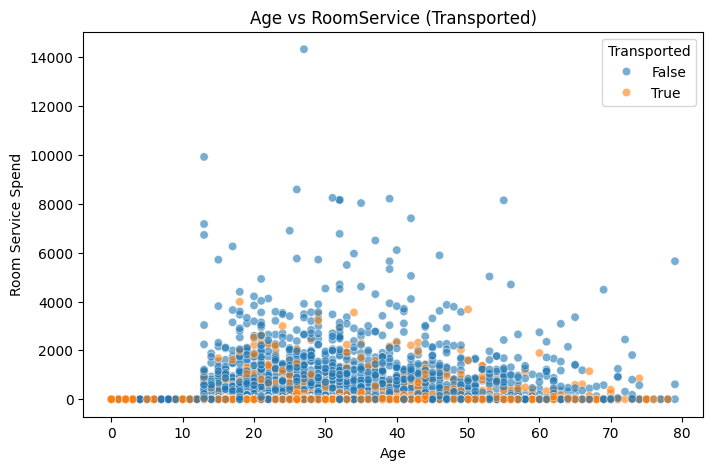

In [23]:
# Age vs RoomService (colored by Transported)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='Age', y='RoomService', hue=train_df['Transported'], alpha=0.6)
plt.title('Age vs RoomService (Transported)')
plt.xlabel('Age')
plt.ylabel('Room Service Spend')
plt.legend(title='Transported')
plt.show()


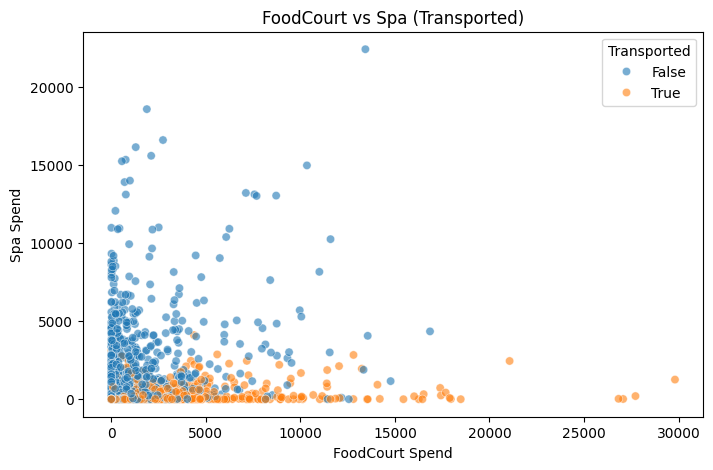

In [24]:
# FoodCourt vs Spa (colored by Transported)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='FoodCourt', y='Spa', hue=train_df['Transported'], alpha=0.6)
plt.title('FoodCourt vs Spa (Transported)')
plt.xlabel('FoodCourt Spend')
plt.ylabel('Spa Spend')
plt.legend(title='Transported')
plt.show()

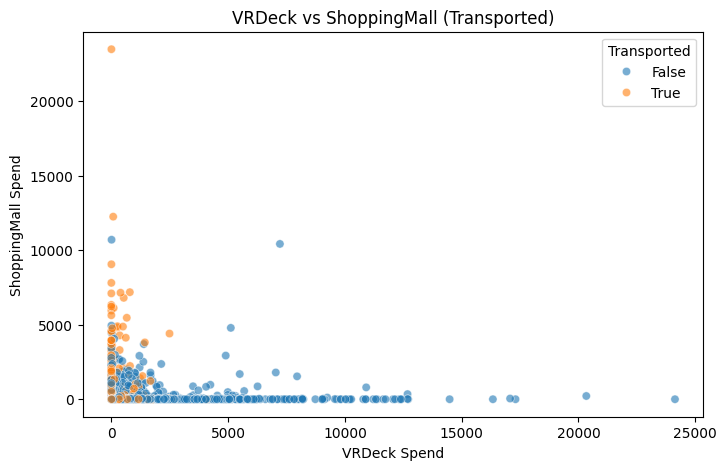

In [25]:
# VRDeck vs ShoppingMall
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='VRDeck', y='ShoppingMall', hue=train_df['Transported'], alpha=0.6)
plt.title('VRDeck vs ShoppingMall (Transported)')
plt.xlabel('VRDeck Spend')
plt.ylabel('ShoppingMall Spend')
plt.legend(title='Transported')
plt.show()

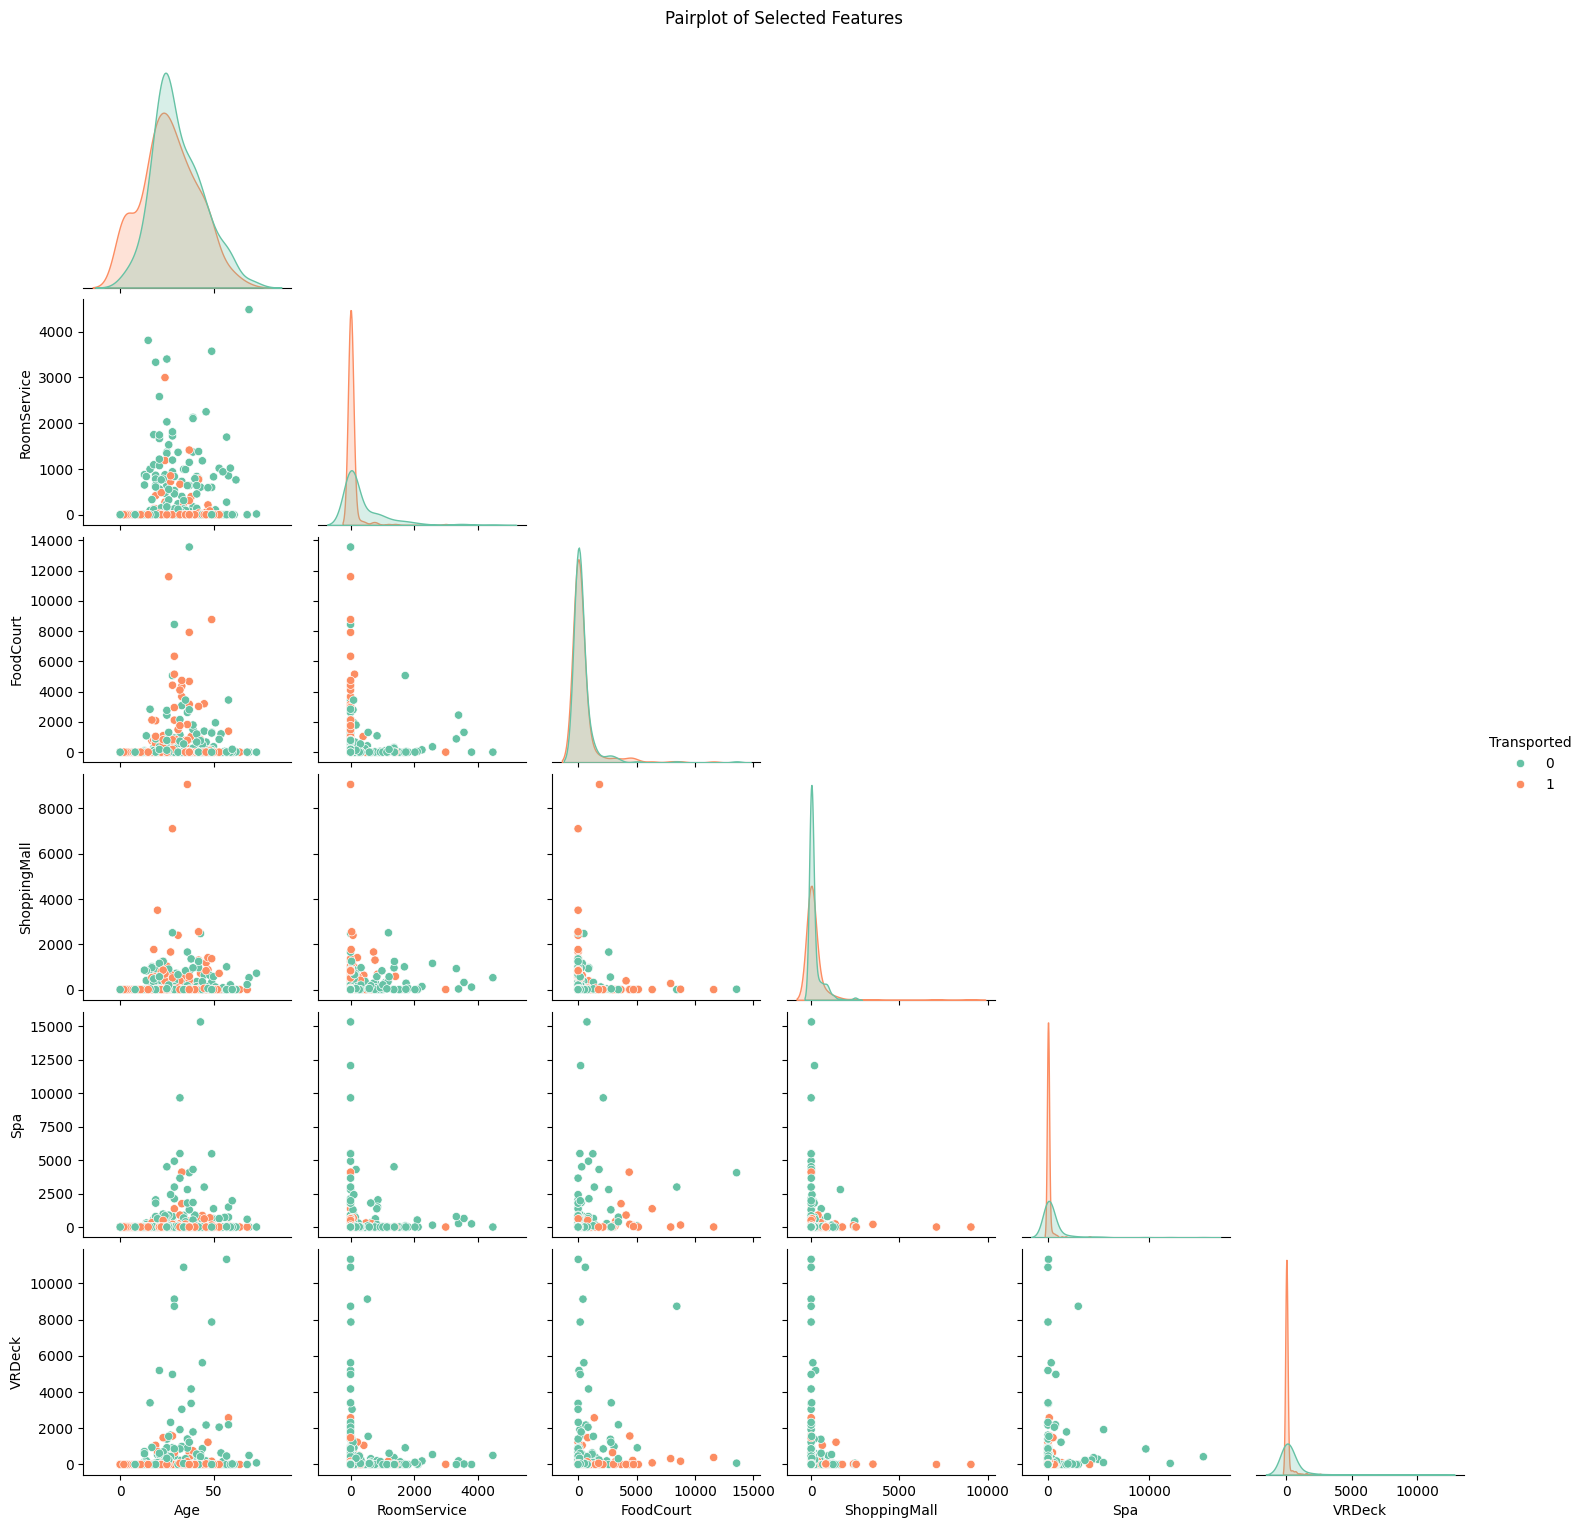

In [26]:

# Combine features and target for plotting

eda_df = train_df.copy()
eda_df['Transported'] = train_df['Transported'].astype(int)


# Limit numeric features to avoid overcrowding
plot_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Plot pairplot (use sample to speed it up)
sns.pairplot(eda_df.sample(500), vars=plot_features, hue='Transported', palette='Set2', corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.savefig("pairplot_features.png")
plt.show()


In [27]:
# --- Drop unnecessary columns ---
drop_cols = ['PassengerId', 'Name', 'Cabin']
train_df.drop(columns=drop_cols, inplace=True, errors='ignore')
test_df.drop(columns=drop_cols, inplace=True, errors='ignore')

# --- Separate numeric and categorical ---
num_cols = train_df.select_dtypes(include='number').columns.tolist()
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
if 'Transported' in cat_cols:
    cat_cols.remove('Transported')

# --- Fill missing values ---
for col in num_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(train_df[col].median())

le_dict = {}
for col in cat_cols:
    mode_val = train_df[col].mode()[0]
    train_df[col] = train_df[col].fillna(mode_val)
    test_df[col] = test_df[col].fillna(mode_val)

    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    le_dict[col] = le

# --- Features and target ---
X = train_df.drop('Transported', axis=1)
y = train_df['Transported'].astype(int)
X_test = test_df.copy()

# --- Train/val split ---
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  stratify=y,
                                                  random_state=42)

# --- Scale for CNN ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# --- Reshape for CNN ---
X_train_cnn = X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(-1, X_val_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(-1, X_test_scaled.shape[1], 1)


/tmp/ipython-input-27-2377660928.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df[col] = train_df[col].fillna(mode_val)
/tmp/ipython-input-27-2377660928.py:21: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df[col] = test_df[col].fillna(mode_val)
/tmp/ipython-input-27-2377660928.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting',


Missing values in train data:
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64


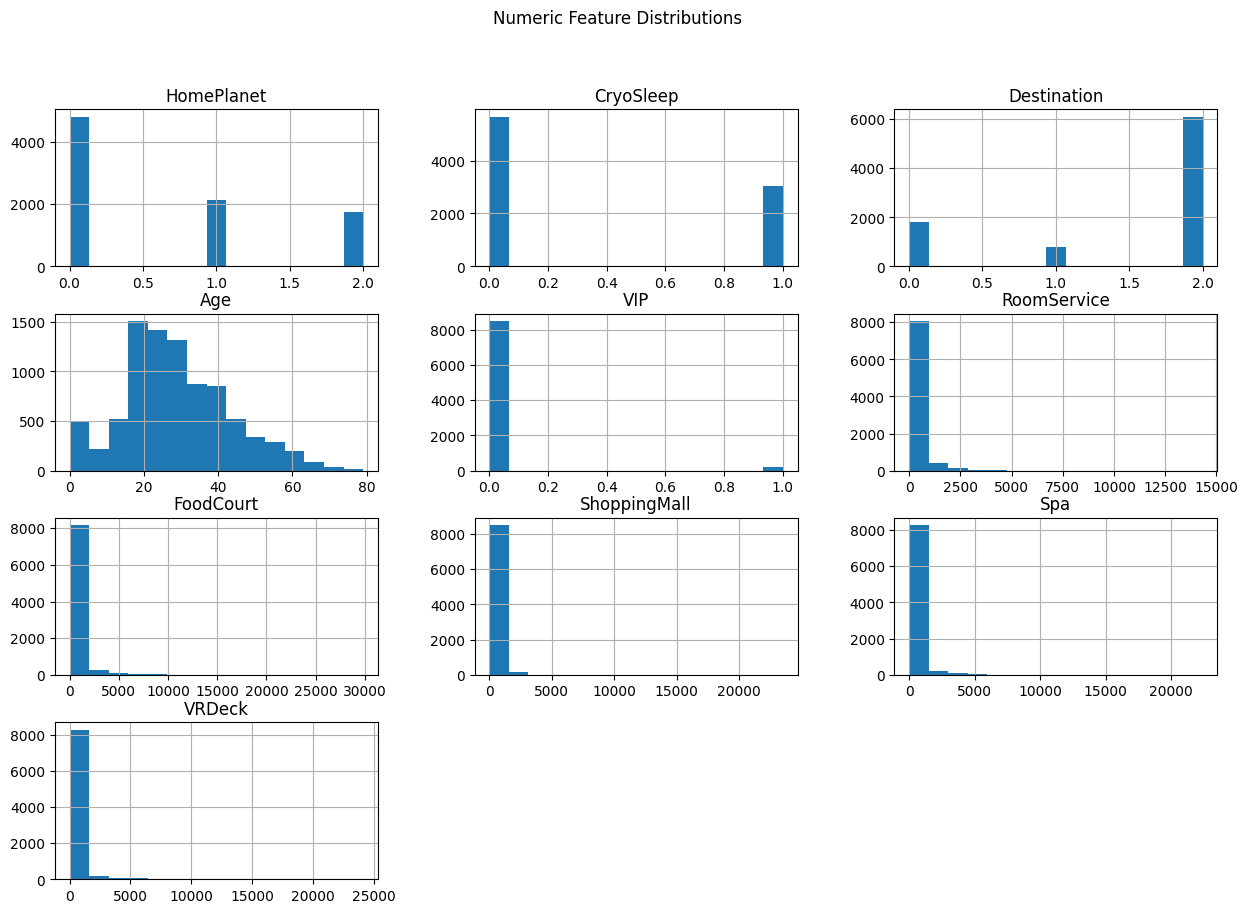

In [28]:

# Check missing data
print("\nMissing values in train data:")
print(train_df.isnull().sum())

# Plot numeric features histograms
num_cols = train_df.select_dtypes(include='number').columns.tolist()
train_df[num_cols].hist(bins=15, figsize=(15,10))
plt.suptitle('Numeric Feature Distributions')
plt.show()

In [29]:
metrics_dict = {}

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

def print_classification_report(y_true, y_pred, model_name):
    print(f"\n=== {model_name} Classification Report ===")
    print(classification_report(y_true, y_pred))


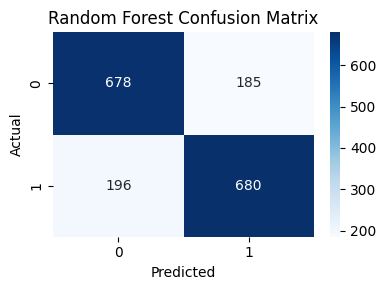


=== Random Forest Classification Report ===
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       863
           1       0.79      0.78      0.78       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



In [30]:
def print_classification_report(y_true, y_pred, model_name):
    print(f"\n=== {model_name} Classification Report ===")
    print(classification_report(y_true, y_pred))

# --- Random Forest ---
from sklearn.metrics import precision_score, recall_score, f1_score # Import the missing metrics
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_val)
test_pred_rf = rf.predict(X_test)

metrics_dict['Random Forest'] = {
    'Accuracy': accuracy_score(y_val, rf_preds),
    'Precision': precision_score(y_val, rf_preds),
    'Recall': recall_score(y_val, rf_preds),
    'F1': f1_score(y_val, rf_preds)
}
plot_confusion_matrix(y_val, rf_preds, "Random Forest")
print_classification_report(y_val, rf_preds, "Random Forest")

In [31]:
pd.DataFrame({'PassengerId': test_passenger_ids, 'Transported': test_pred_rf.astype(bool)}).to_csv("submission_rf.csv", index=False)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [21:36:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


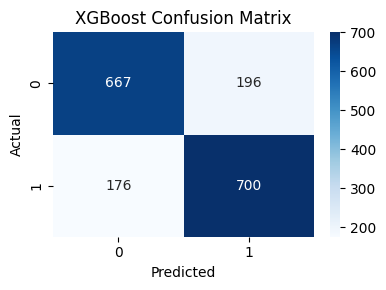


=== XGBoost Classification Report ===
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       863
           1       0.78      0.80      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



In [32]:

# --- XGBoost ---
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train, y_train)
xgb_preds = xgb_clf.predict(X_val)
test_pred_xgb = xgb_clf.predict(X_test)

metrics_dict['XGBoost'] = {
    'Accuracy': accuracy_score(y_val, xgb_preds),
    'Precision': precision_score(y_val, xgb_preds),
    'Recall': recall_score(y_val, xgb_preds),
    'F1': f1_score(y_val, xgb_preds)
}
plot_confusion_matrix(y_val, xgb_preds, "XGBoost")
print_classification_report(y_val, xgb_preds, "XGBoost")

🔍 Calculating SHAP values for Random Forest...
📊 SHAP Summary Plot for Random Forest


/tmp/ipython-input-33-3123967635.py:22: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(summary_rf, X_rf_plot, feature_names=X_rf_plot.columns)
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:723: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(
/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:743: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  summary_legacy(


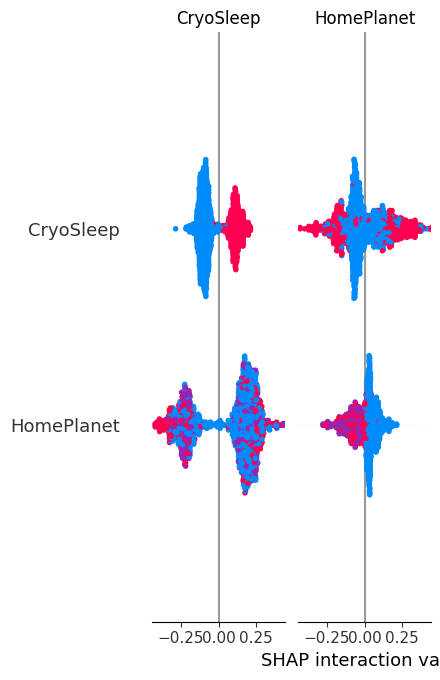

In [33]:
import shap

# Random Forest SHAP
print("🔍 Calculating SHAP values for Random Forest...")
explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_val)

# Handle binary classification
if isinstance(shap_values_rf, list):
    print("Random Forest SHAP returned list (binary). Using class 1 SHAP values.")
    summary_rf = shap_values_rf[1]
else:
    summary_rf = shap_values_rf

if summary_rf.shape[1] != X_val.shape[1]:
    print(f"Mismatch in SHAP vs. input features: {summary_rf.shape} vs {X_val.shape}")
    X_rf_plot = X_val.iloc[:, :summary_rf.shape[1]]
else:
    X_rf_plot = X_val

print("📊 SHAP Summary Plot for Random Forest")
shap.summary_plot(summary_rf, X_rf_plot, feature_names=X_rf_plot.columns)


In [34]:
pd.DataFrame({'PassengerId': test_passenger_ids, 'Transported': test_pred_xgb.astype(bool)}).to_csv("submission_xgb.csv", index=False)

/tmp/ipython-input-35-3249093759.py:5: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_train, plot_type='bar', show=True)


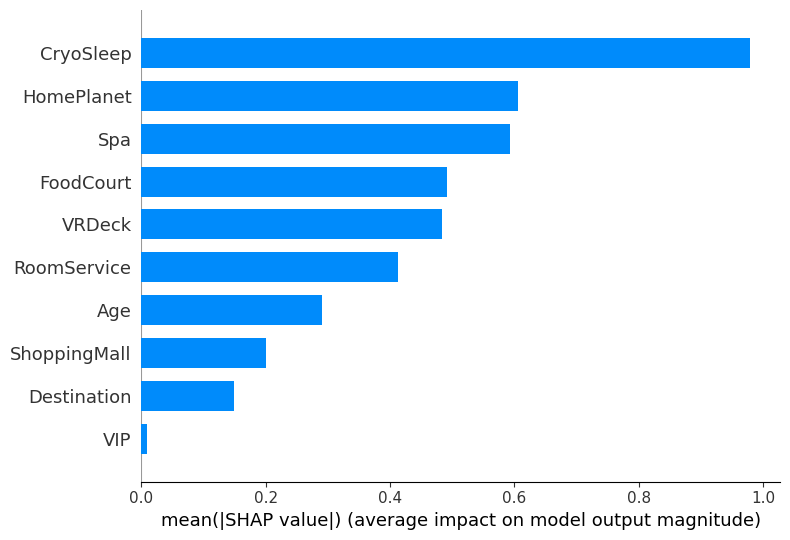

/tmp/ipython-input-35-3249093759.py:6: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_xgb, X_train, show=True)


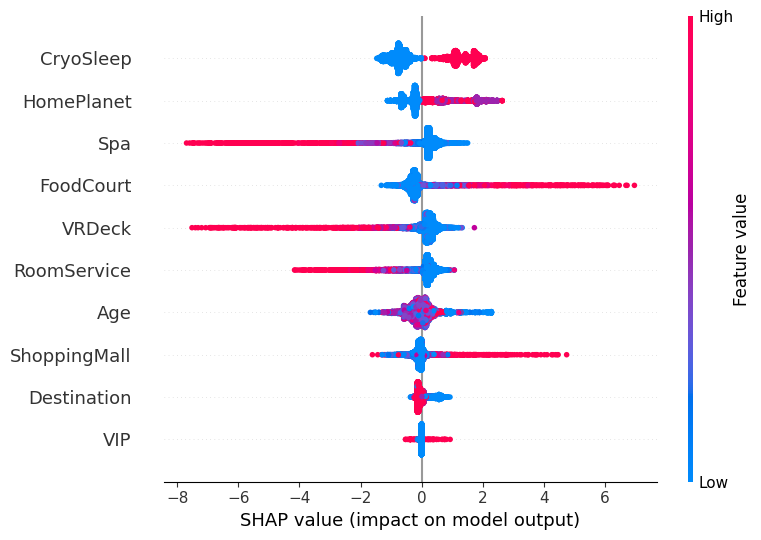

In [35]:
explainer_xgb = shap.Explainer(xgb_clf)
shap_values_xgb = explainer_xgb(X_train)

# Summary plot
shap.summary_plot(shap_values_xgb, X_train, plot_type='bar', show=True)
shap.summary_plot(shap_values_xgb, X_train, show=True)

In [36]:
# --- CNN ---
cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_val_cnn, y_val), verbose=0)

cnn_preds = (cnn.predict(X_val_cnn) > 0.5).astype(int).flatten()
test_pred_cnn = (cnn.predict(X_test_cnn) > 0.5).astype(bool).flatten()

metrics_dict['CNN'] = {
    'Accuracy': accuracy_score(y_val, cnn_preds),
    'Precision': precision_score(y_val, cnn_preds),
    'Recall': recall_score(y_val, cnn_preds),
    'F1': f1_score(y_val, cnn_preds)
}
plot_confusion_matrix(y_val, cnn_preds, "CNN")
print_classification_report(y_val, cnn_preds, "CNN")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'GlobalMaxPooling1D' is not defined

In [ ]:
pd.DataFrame({'PassengerId': test_passenger_ids, 'Transported': test_pred_cnn}).to_csv("submission_cnn.csv", index=False)

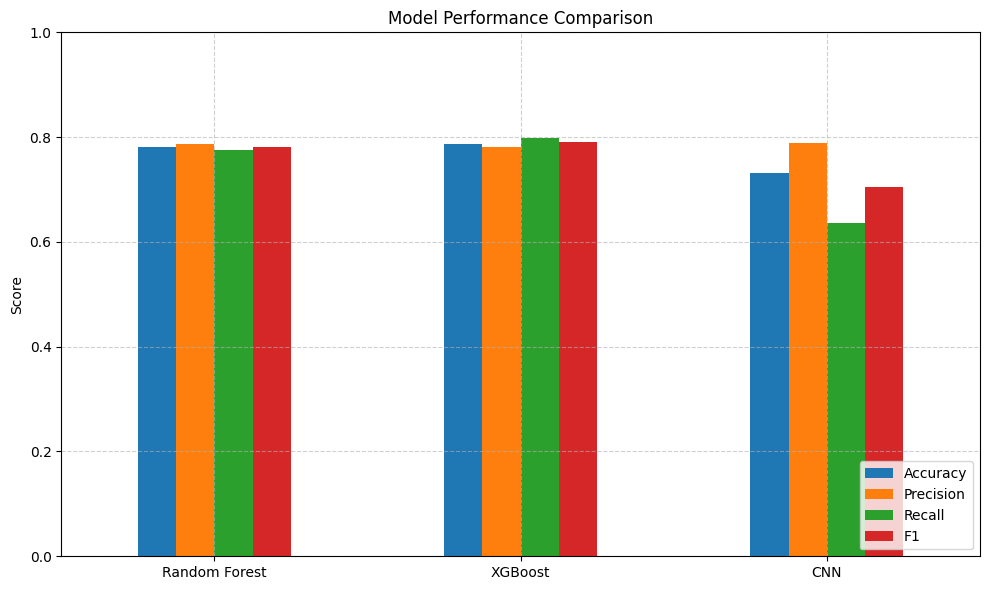

In [ ]:
metrics_df = pd.DataFrame(metrics_dict).T
metrics_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Reload train and test data
train_url = "https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/train-3.csv"
test_url = "https://raw.githubusercontent.com/Kaggle-challange-group8/Titanic_space_ship_group_8/refs/heads/main/test-3.csv"

train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)



Train shape: (8693, 14)
Test shape: (4277, 13)


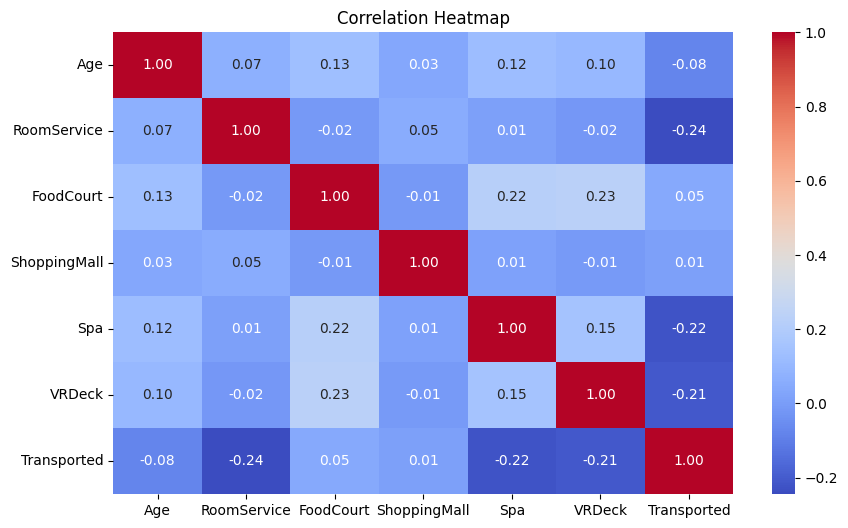

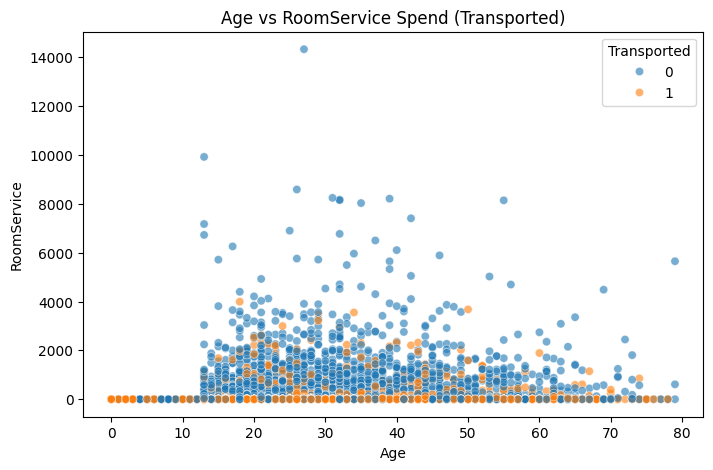

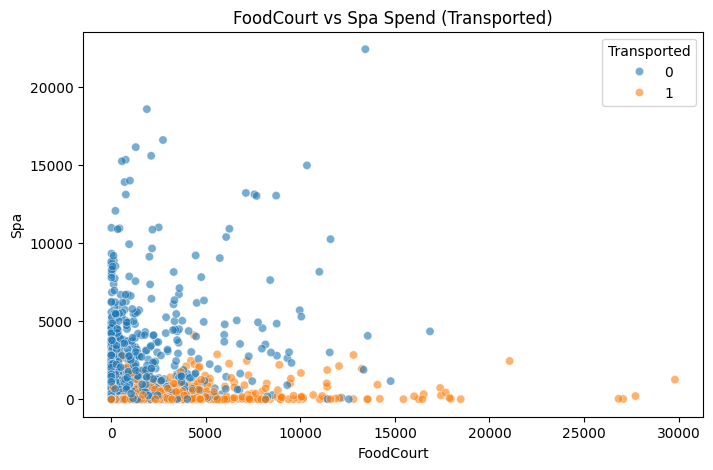

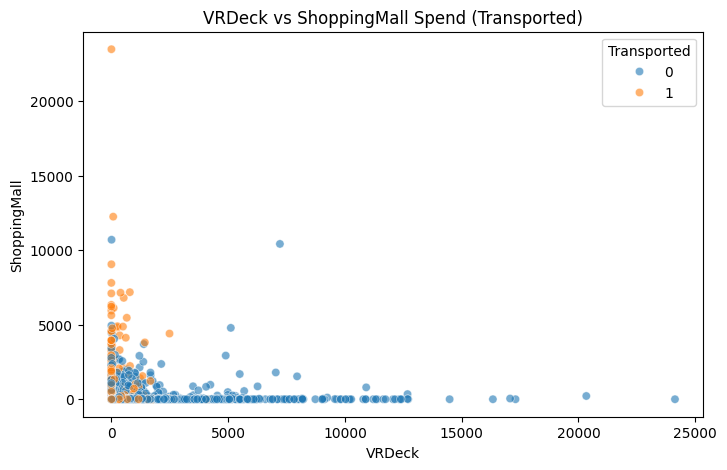

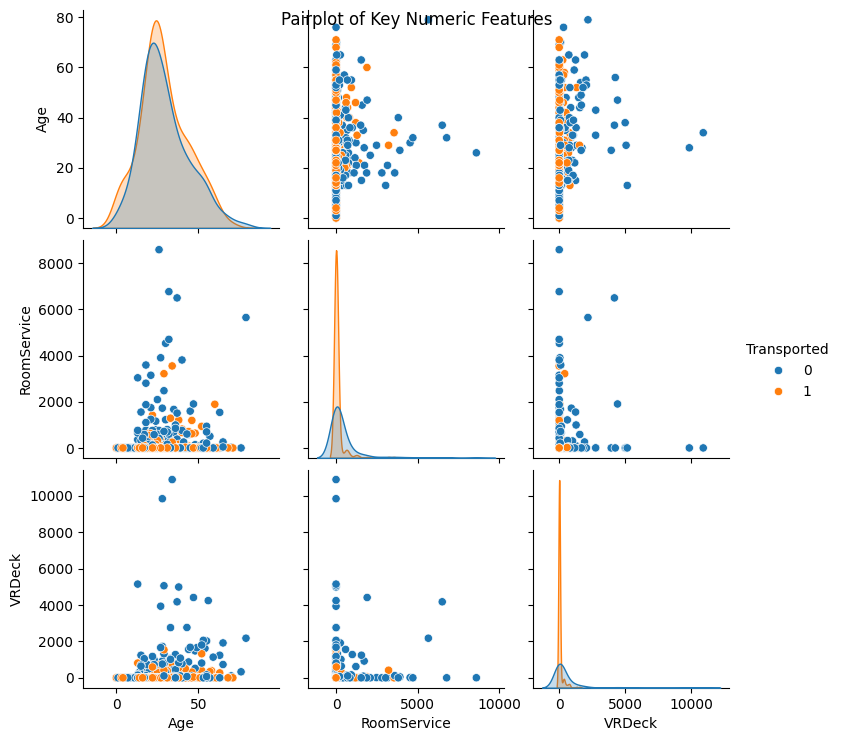

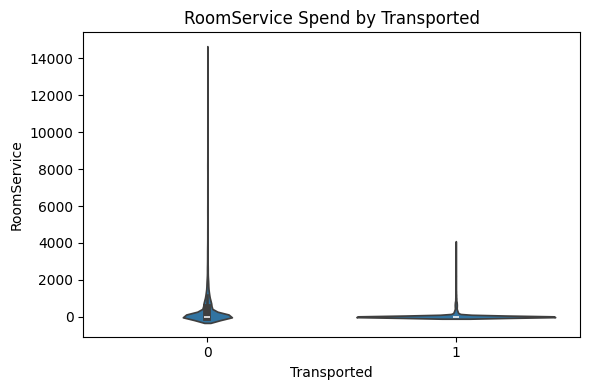

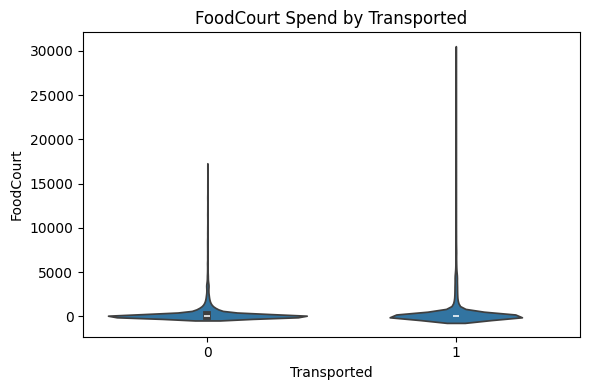

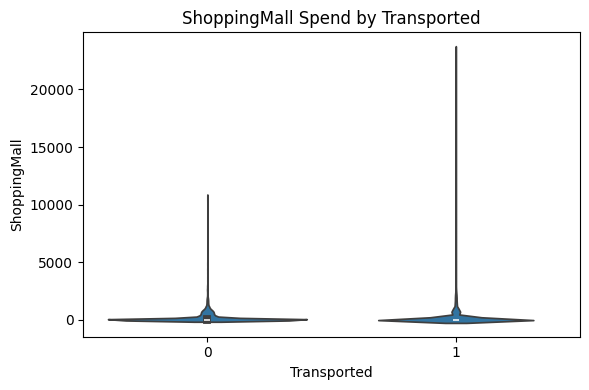

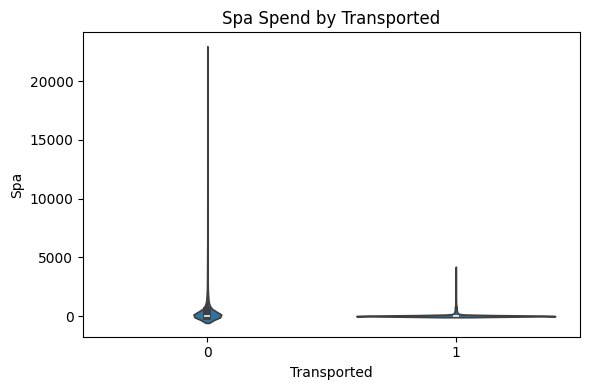

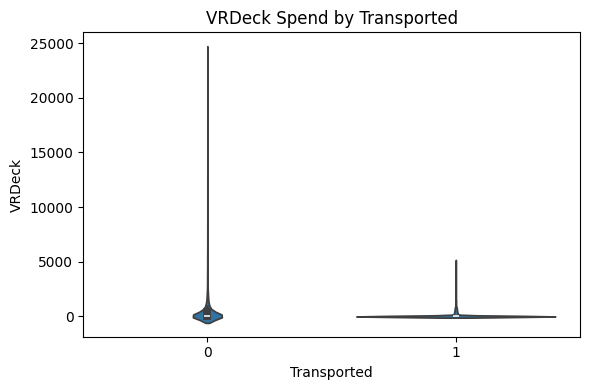

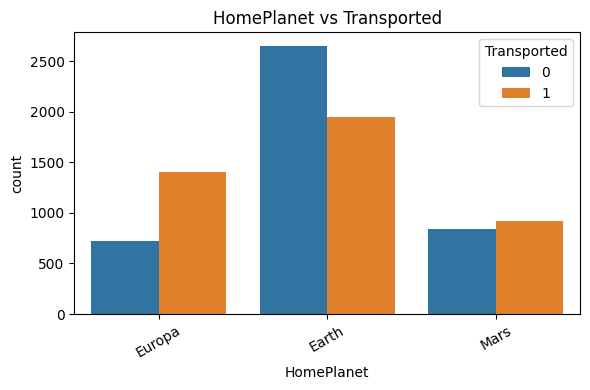

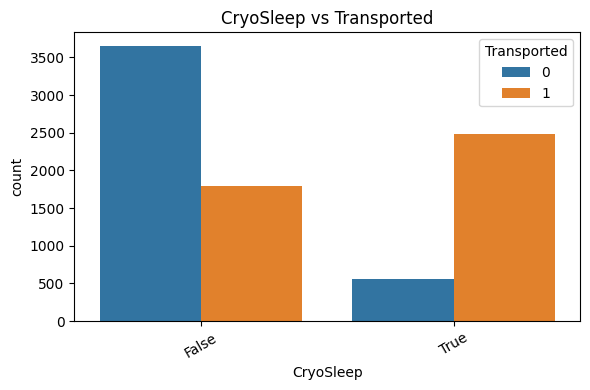

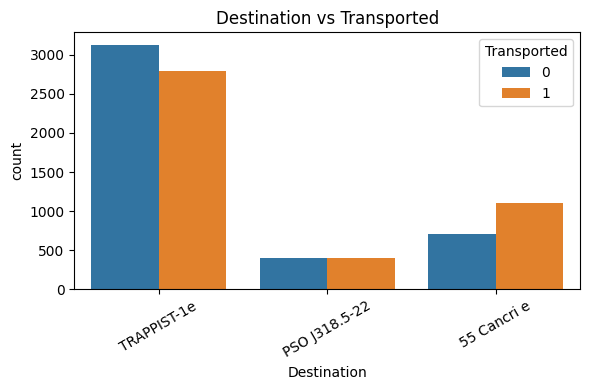

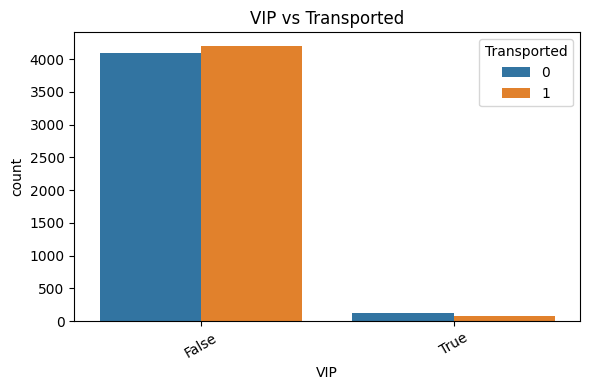

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno

# Convert 'Transported' to int
train_df['Transported'] = train_df['Transported'].astype(int)

# --- 1. Correlation Heatmap ---
plt.figure(figsize=(10, 6))
corr_matrix = train_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# --- 2. Scatter Plots ---
plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='Age', y='RoomService', hue='Transported', alpha=0.6)
plt.title('Age vs RoomService Spend (Transported)')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='FoodCourt', y='Spa', hue='Transported', alpha=0.6)
plt.title('FoodCourt vs Spa Spend (Transported)')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(data=train_df, x='VRDeck', y='ShoppingMall', hue='Transported', alpha=0.6)
plt.title('VRDeck vs ShoppingMall Spend (Transported)')
plt.show()

# --- 3. Pairplot (Extra Dimensions) ---
sample_df = train_df[['Age', 'RoomService', 'VRDeck', 'Transported']].dropna().sample(n=500, random_state=42)
sns.pairplot(sample_df, hue='Transported')
plt.suptitle("Pairplot of Key Numeric Features")
plt.show()

# --- 4. Boxplot / Violin plots ---
spend_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for feature in spend_features:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Transported', y=feature, data=train_df)
    plt.title(f'{feature} Spend by Transported')
    plt.tight_layout()
    plt.show()

# --- 5. Countplots for Categorical Features ---
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_df, x=col, hue='Transported')
    plt.title(f'{col} vs Transported')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


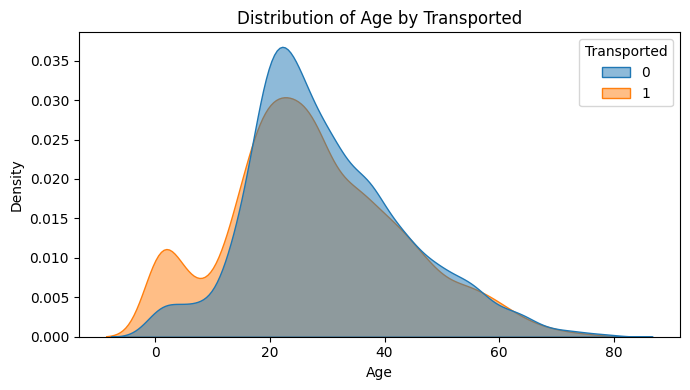

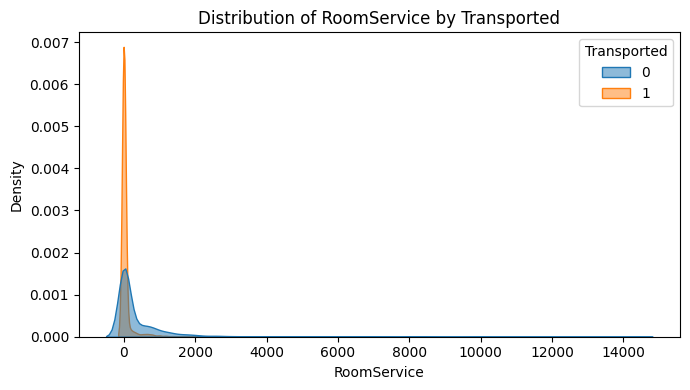

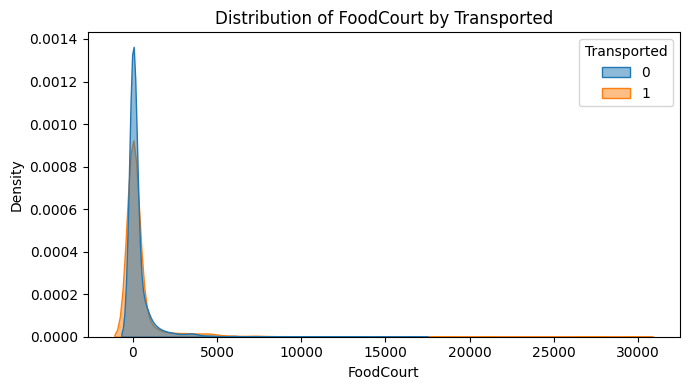

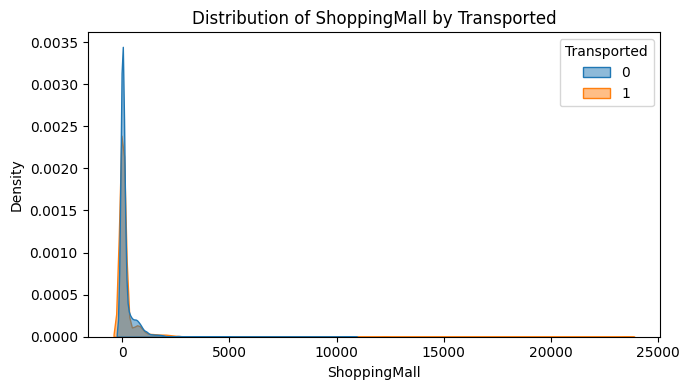

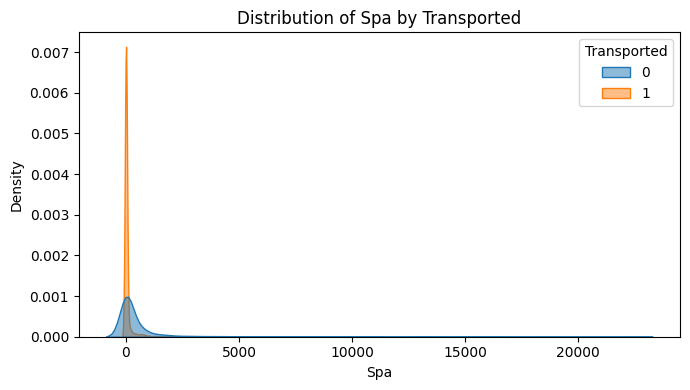

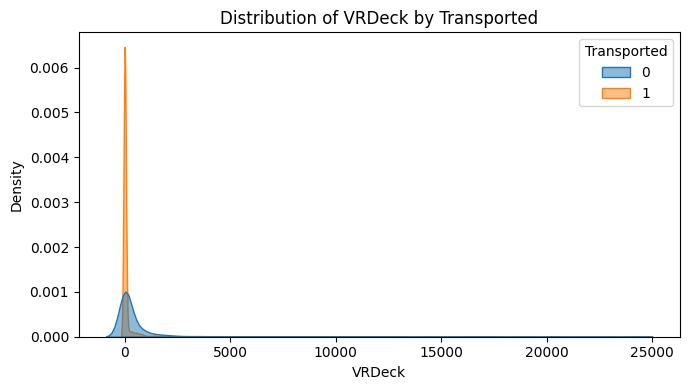

In [ ]:
# Continuous features KDE plots by class
continuous_features = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

for feature in continuous_features:
    plt.figure(figsize=(7, 4))
    sns.kdeplot(data=train_df, x=feature, hue='Transported', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {feature} by Transported')
    plt.tight_layout()
    plt.show()


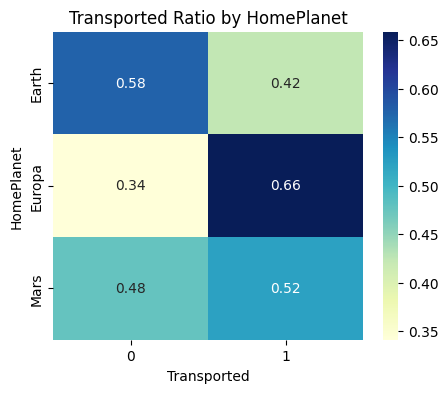

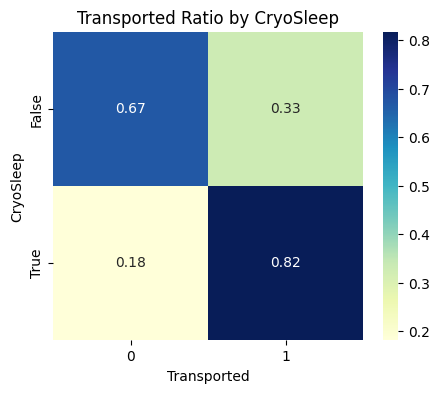

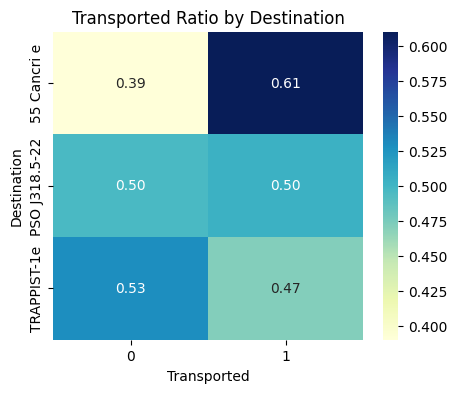

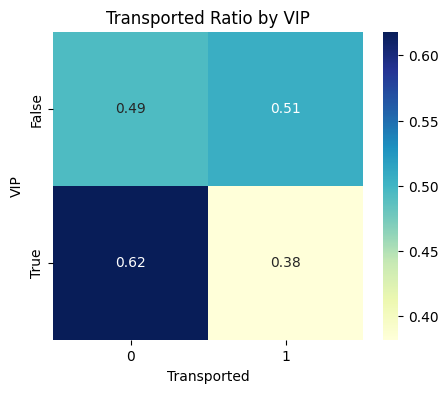

In [ ]:
# Crosstab Heatmaps
categorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for col in categorical_features:
    plt.figure(figsize=(5, 4))
    cross_tab = pd.crosstab(train_df[col], train_df['Transported'], normalize='index')
    sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt=".2f")
    plt.title(f'Transported Ratio by {col}')
    plt.ylabel(col)
    plt.xlabel('Transported')
    plt.show()


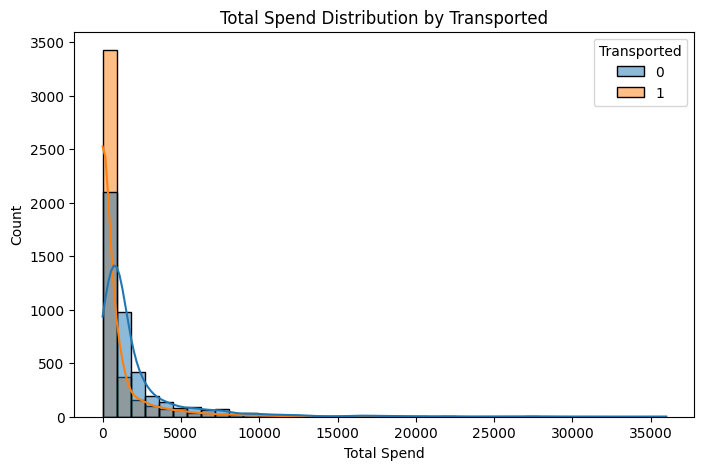

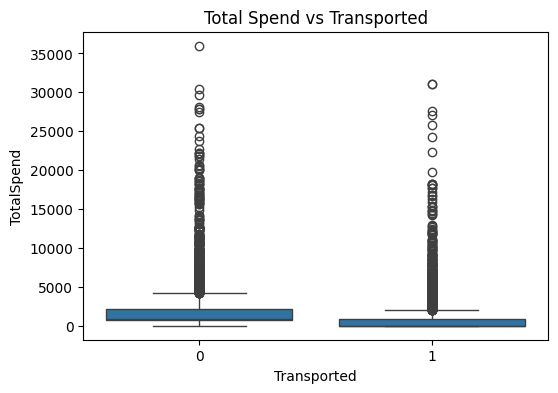

In [ ]:
# Total spend feature
train_df['TotalSpend'] = train_df[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

plt.figure(figsize=(8, 5))
sns.histplot(data=train_df, x='TotalSpend', hue='Transported', bins=40, kde=True)
plt.title("Total Spend Distribution by Transported")
plt.xlabel("Total Spend")
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=train_df, x='Transported', y='TotalSpend')
plt.title("Total Spend vs Transported")
plt.show()


<Figure size 1000x500 with 0 Axes>

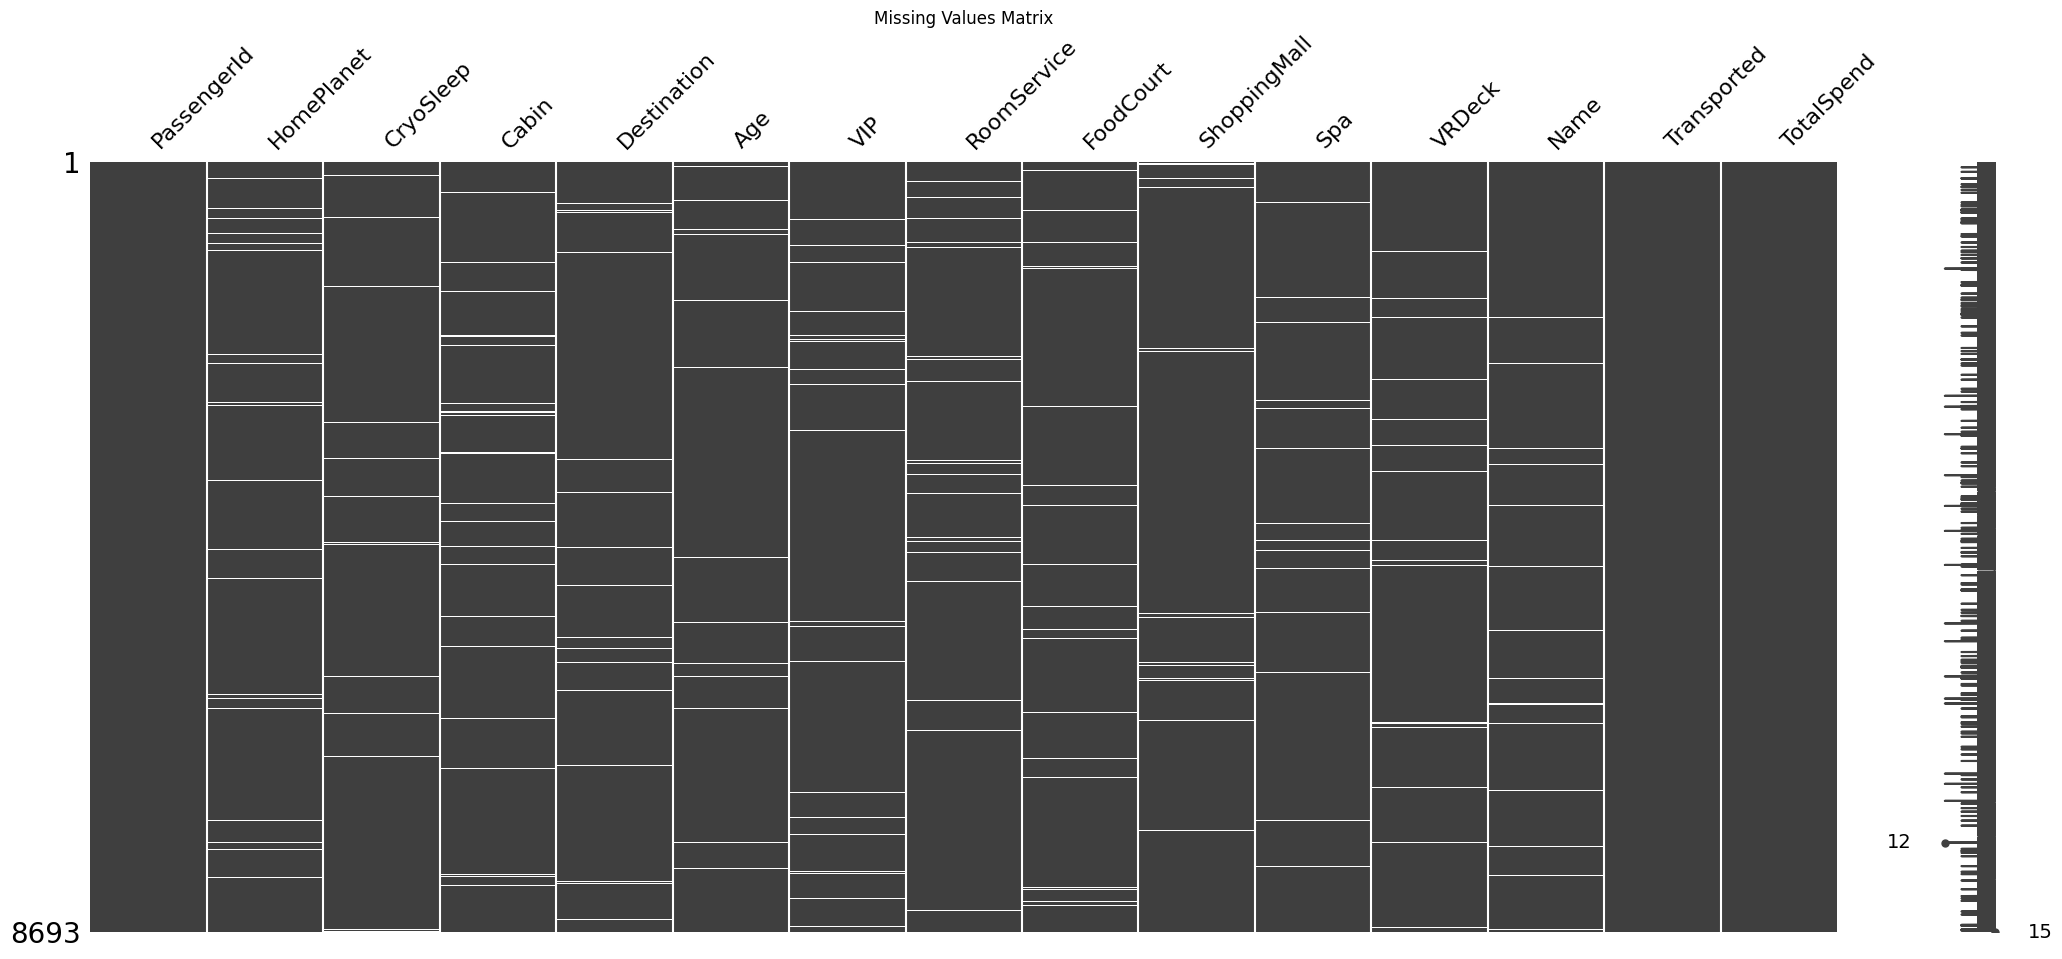

<Figure size 1000x600 with 0 Axes>

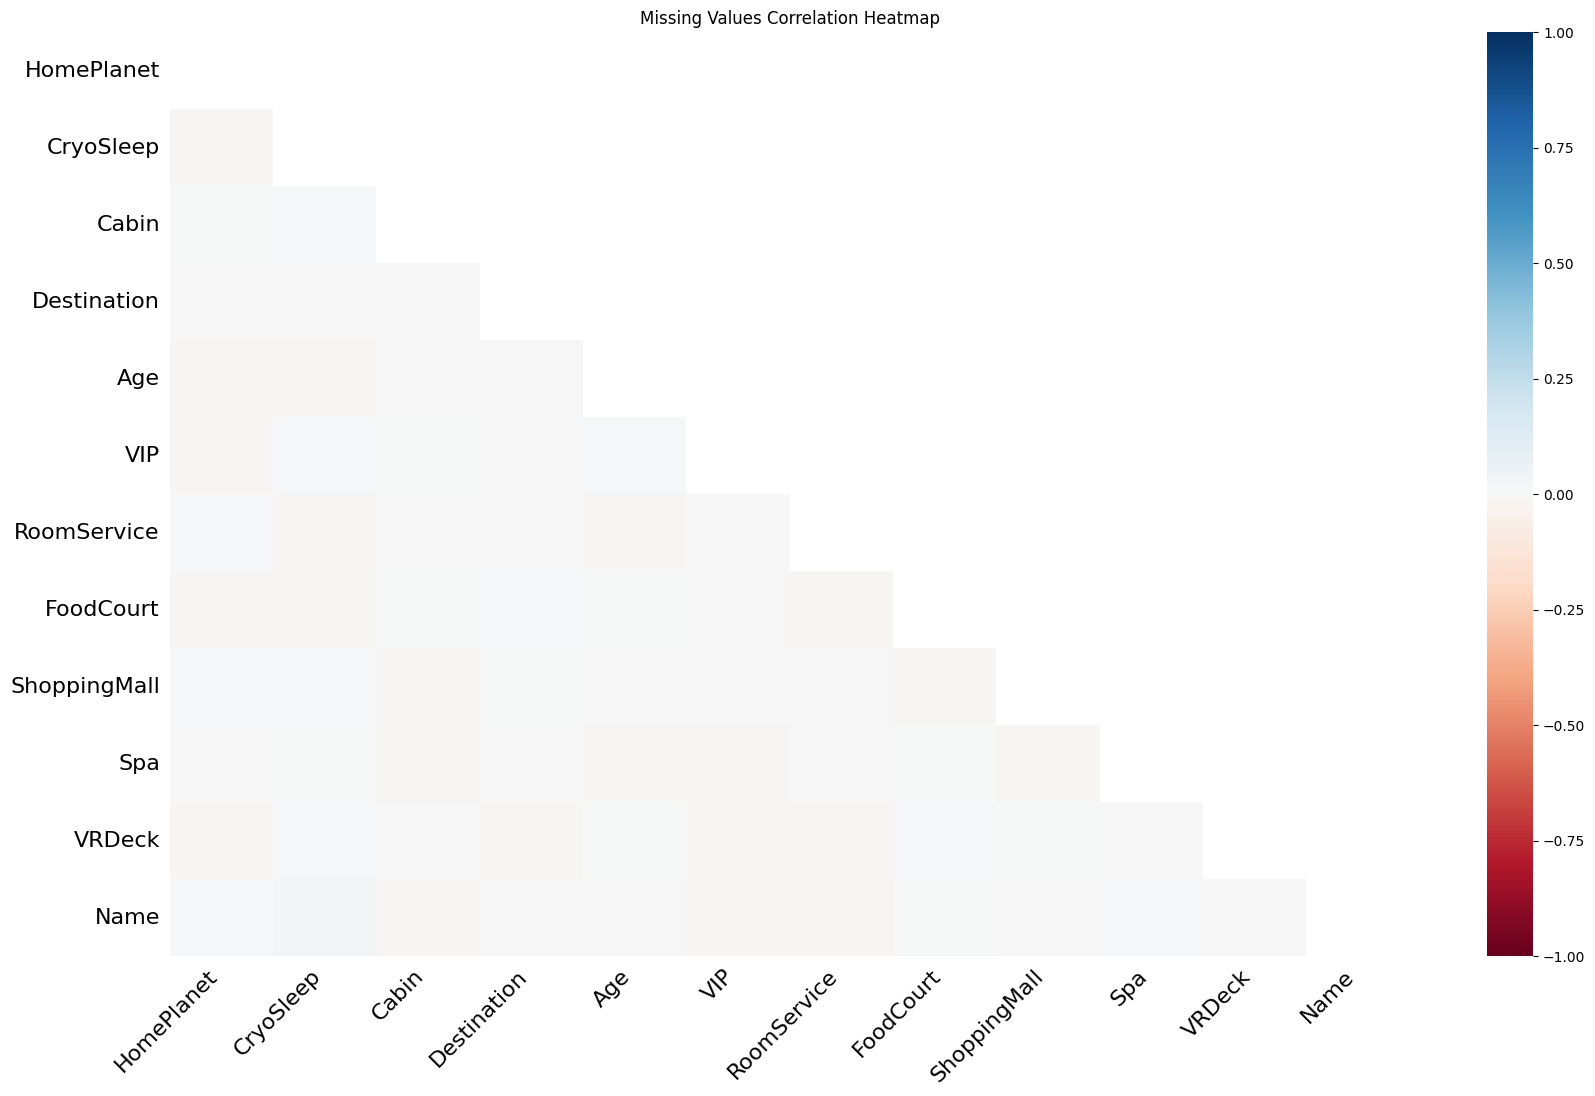

In [ ]:
import missingno as msno

plt.figure(figsize=(10, 5))
msno.matrix(train_df)
plt.title("Missing Values Matrix")
plt.show()

# Correlation heatmap of missingness
plt.figure(figsize=(10, 6))
msno.heatmap(train_df)
plt.title("Missing Values Correlation Heatmap")
plt.show()


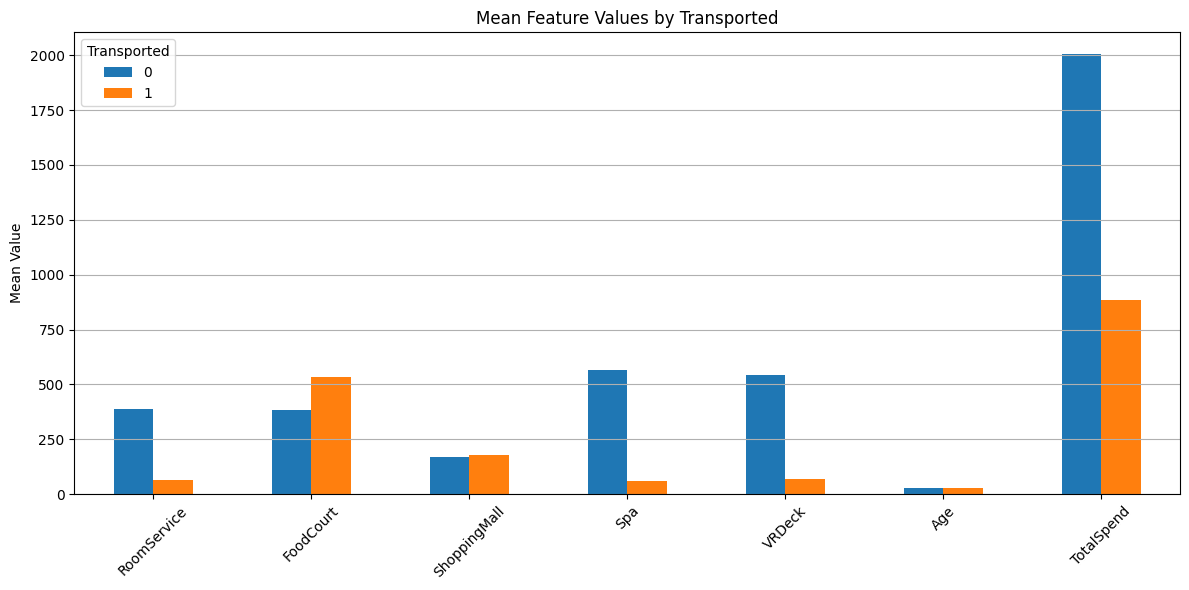

In [ ]:
#Group means
means_by_target = train_df.groupby('Transported')[spend_features + ['Age', 'TotalSpend']].mean().T

# Bar plot of means
means_by_target.plot(kind='bar', figsize=(12, 6), title="Mean Feature Values by Transported")
plt.ylabel("Mean Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

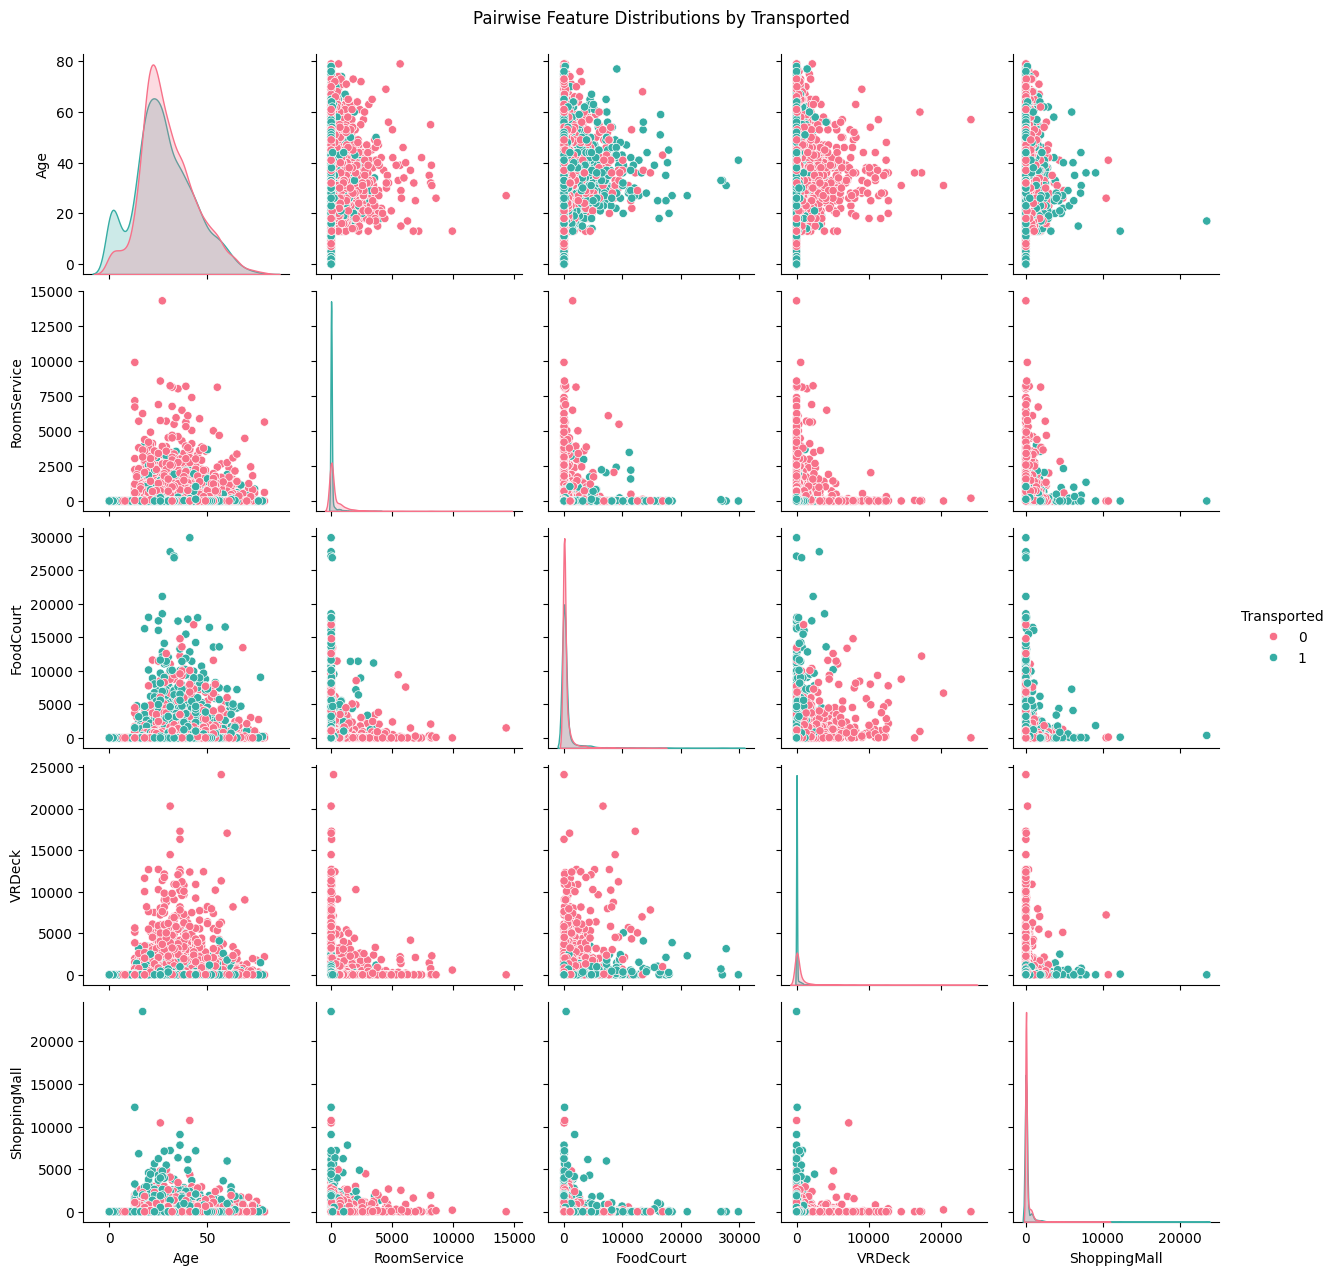

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select subset of numeric features
pairplot_features = ['Age', 'RoomService', 'FoodCourt', 'VRDeck', 'ShoppingMall', 'Transported']
sns.pairplot(train_df[pairplot_features], hue='Transported', palette='husl')
plt.suptitle("Pairwise Feature Distributions by Transported", y=1.02)
plt.show()

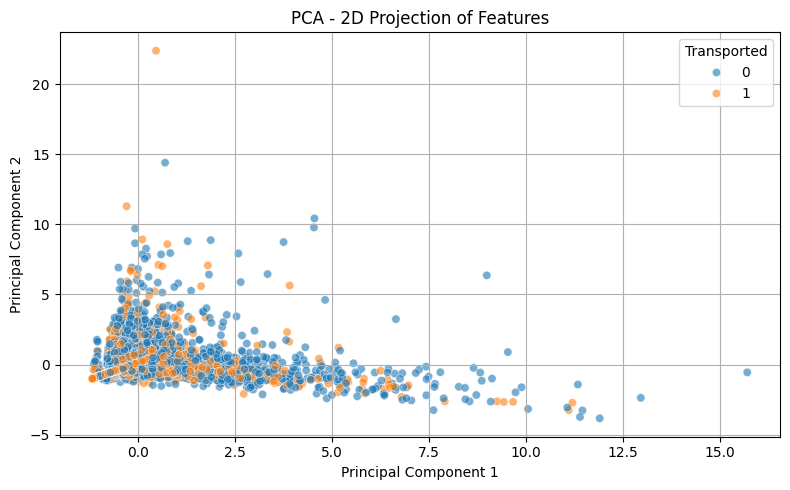

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Drop non-numeric, scale features
features_for_pca = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X_scaled = StandardScaler().fit_transform(train_df[features_for_pca].fillna(0))

# PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
train_df['PCA1'], train_df['PCA2'] = pca_components[:, 0], pca_components[:, 1]

# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue='Transported', data=train_df, alpha=0.6)
plt.title("PCA - 2D Projection of Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Transported")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Encode Transported as int
train_df['Transported_numeric'] = train_df['Transported'].astype(int)

# Calculate correlations
correlations = train_df.corr(numeric_only=True)['Transported_numeric'].sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 5))
correlations.drop('Transported_numeric').plot(kind='bar', color='teal')
plt.title("Feature Correlation with Transported")
plt.ylabel("Correlation Coefficient")
plt.grid(axis='y')
plt.tight_layout()
plt.show()